<h1> Students Performance In Exams Project

In this dataset, we will deal with the students' scores which explain the students' performance and the factor that will affect their scores, and if we give all these factors together to the students, will they get the high score or not

Done by **Islam Aljuneidi**

<img src="students.jpg"/>

<h2>Table of contents

<ul>
<li><a href="intro"><b>Introduction
    
<li><a href="Ques"><b>Research Question
    
<li><a href="wrangling"><b>Data Wrangling
    
<li><a href="eda"><b>Exploratory_Data Analysis
    
<li><a href="feature"><b>Feature Engineering
    
<li><a href="draw"><b>Conclusion

<h3 id="intro">Introduction

In this section, we will briefly explain our dataset, what it contains, and also what is each column?so our dataset contains 1 k rows and 8 columns so we explain once over what does it contains each column?

<ol>
<li>Gender:- Sex of Students
<li>Race/Ethnicity:- Ethncity of students
<li>Parental level of education:- Parent's final education
<li>Lunch:- Having Lunch(Before or After having Lunch)
<li>Test preparation course:- complete or not complete before test


<h3 id="Ques">Research Questions

<ul><li>In this section we will ask ourselves what we need from this dataset I think that section is the most important step in data analysis steps because if you ask the right question you will get specific information and according to that  will help you to  make right decisions and efficient.

<ol>

<li>Which gender achieves a high score male or female? and In any test, in particular, males or females outperform the other?
<li>Which race(Category) gets a higher score than the other?
<li>Does parental education affect students’ grades or performance?
<li>Is eating a lunch before taking the exam a factor influencing students’ performance, or is it preferable not to eat a lunch?
<li>Will taking a test or preparing for the exam before entering it will pave the way for you to get high grades, or not?

<h3>Import libraries

Now, Let's import some of the various commands and have access to our dataset.

In [1]:
import time 
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 
from numpy.polynomial.polynomial import polyfit
import seaborn as sns
import statsmodels.api as sms
%matplotlib inline
random.seed(40)
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

C:\Users\Islam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Islam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


<h3>Data Wrangling

let's divide data wrangling to three main factors **Gathering Data,assess and cleaning Data**

<h4>Gathering Data

In [2]:
#import our dataset -the file is csv so we will use read_csv to read our file
df=pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<h4>Assessing Data


at this section we dig into the data if they duplicated rows,missing value or rename columns

In [3]:
#size Dataseet what does it contains
df.shape

(1000, 8)

In [4]:
#names of our columns
for x in list(df.columns[0:]):
    print(x)

gender
race/ethnicity
parental level of education
lunch
test preparation course
math score
reading score
writing score


In [5]:
#check if there any missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<ul><li>there isn't any missing values at our dataset

In [6]:
#check if there any duplicated values
df.duplicated().sum()

0

<ul><li>there isn't any duplicated values at our dataset

In [7]:
#Let's take a quick overview of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#describe our  numerical Data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
#describe our  Gategorical Data
df.describe(include=[object])

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [10]:
# number of non-null unique values for each feature
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

<h4>Data Cleaning


In [11]:
#rename columns that will be prevent them like if there any spaces or languge error
columns=['Gender', 'Race/Ethnicity', 'Parental_education', 'lunch',
       'Test_preparation', 'Math_score', 'Reading_score',
       'Writing_score']
df.columns=columns
for x in list(df.columns[0:]):
    print(x)

Gender
Race/Ethnicity
Parental_education
lunch
Test_preparation
Math_score
Reading_score
Writing_score


<ul><li>There are not any <b>missing values or duplicated values

<h3 id="eda">Exploratory_Data Analysis


<ul><li>Explore our dataset if there are any outliers or find out any value that we didn't detect when we do any numerical computation

In [12]:
df.head()

,Gender,Race/Ethnicity,Parental_education,lunch,Test_preparation,Math_score,Reading_score,Writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


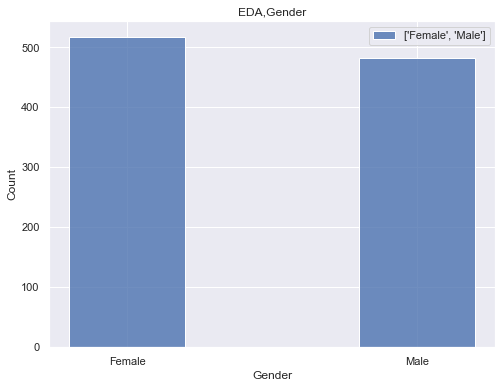

In [13]:
fig=plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.histplot(data=df,x="Gender",shrink=.4,color = "#4C72B0",alpha=.8,label=["Female","Male"])
plt.title('EDA,Gender')
plt.xticks(["female","male"],["Female","Male"])
plt.legend()
plt.show()

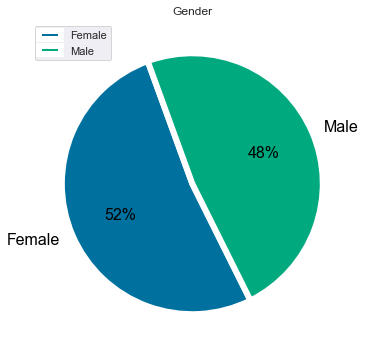

In [14]:
#define Seaborn color palette to use
plt.figure(figsize=[10,6])
plt.pie(df["Gender"].value_counts(),
        startangle = 110,
        textprops = {'color': 'black','fontsize':16},
        wedgeprops = {'linewidth': 6},
        labels=["Female","Male"],
        center = (0.1,0.1),
        autopct = '%0.0f%%',colors=["#00719F","#00AA7E"])
plt.title("Gender")
plt.grid(True)
plt.legend()
plt.show()


In [15]:
df["Gender"].value_counts()

female    518
male      482
Name: Gender, dtype: int64

<ul><li>Note that there is <b>no big difference between the number of females and males

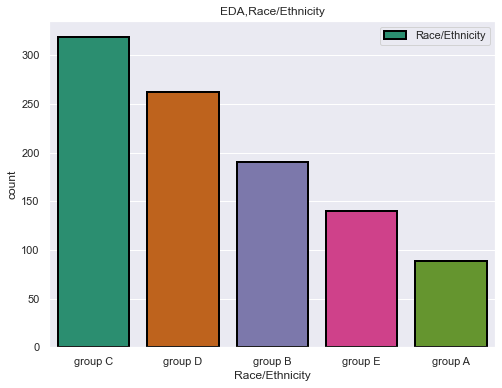

In [16]:
fig=plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.countplot(data=df,x=df["Race/Ethnicity"],order = df['Race/Ethnicity'].value_counts().index,edgecolor=(0,0,0),
                  linewidth=2,
                  palette="Dark2",label="Race/Ethnicity")
plt.title('EDA,Race/Ethnicity')
plt.legend()
plt.show()

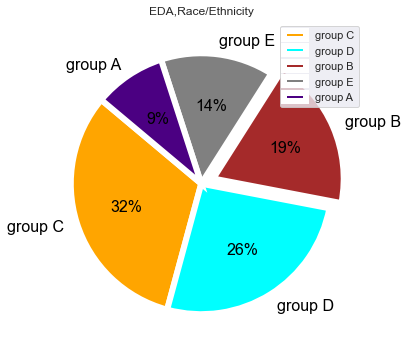

In [17]:
#define Seaborn color palette to use
plt.figure(figsize=[10,6])
explode=(0,0,0.1,0,0)
colors = ( "orange", "cyan", "brown",
          "grey", "indigo")
plt.pie(df["Race/Ethnicity"].value_counts(),
        startangle = 140,
        textprops = {'color': 'black','fontsize':16},
        wedgeprops = {'linewidth': 6},
        labels=['group C', 'group D', 'group B', 'group E', 'group A'],
        center = (0.1,0.1),
        autopct = '%0.0f%%',explode = explode,colors=colors)
plt.title("EDA,Race/Ethnicity")
plt.legend()
plt.show()


In [18]:
df["Race/Ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: Race/Ethnicity, dtype: int64

<ul><li>Note that <b>Race/C is the highest category in your data

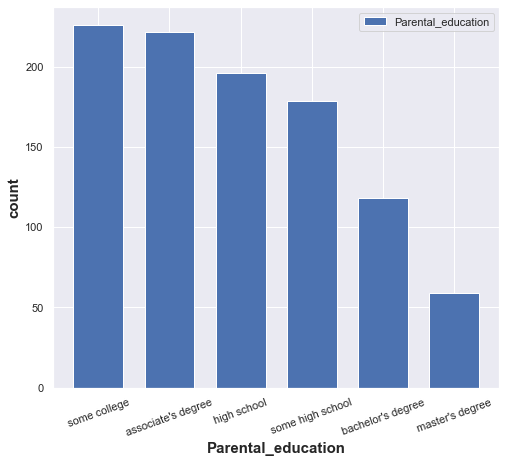

In [19]:
plt.figure(figsize=(8, 7))
x=(df["Parental_education"].value_counts().sort_values(ascending=False)).index
plt.bar(x,df["Parental_education"].value_counts().sort_values(ascending=False),width=.7,label="Parental_education")
plt.xticks(rotation=20)
plt.legend()
plt.xlabel("Parental_education",fontweight ='bold', fontsize = 15)
plt.ylabel("count",fontweight ='bold', fontsize = 15)
plt.show()

In [20]:
df["Parental_education"].value_counts().sort_values(ascending=False)

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: Parental_education, dtype: int64

<ul><li>Note that <b>associate's degree is the highest degree in your data

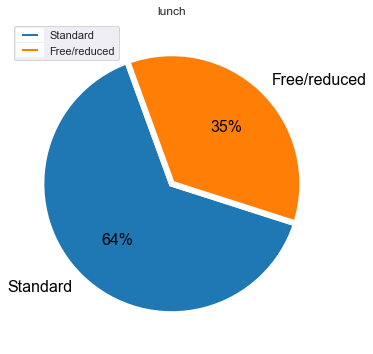

In [21]:
#define Seaborn color palette to use
plt.figure(figsize=[10,6])
plt.pie(df["lunch"].value_counts(),
        startangle = 110,
        textprops = {'color': 'black','fontsize':16},
        wedgeprops = {'linewidth': 6},
        labels=["Standard","Free/reduced"],
        center = (0.1,0.1),
        autopct = '%0.0f%%',colors=["#1F78B4","#FF7E06"])
plt.title("lunch")
plt.grid(True)
plt.legend()
plt.show()

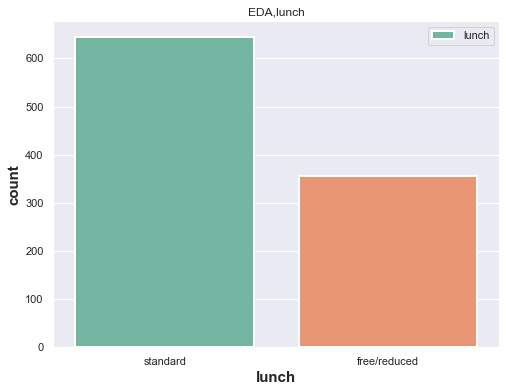

In [22]:
fig=plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.countplot(data=df,x="lunch",
                  linewidth=2,
                  label="lunch",palette="Set2")

plt.title('EDA,lunch')
plt.xlabel("lunch",fontweight ='bold', fontsize = 15)
plt.ylabel("count",fontweight ='bold', fontsize = 15)
plt.legend()
plt.show()

<ul><li>Note that <b>Standard is the highest category in your data

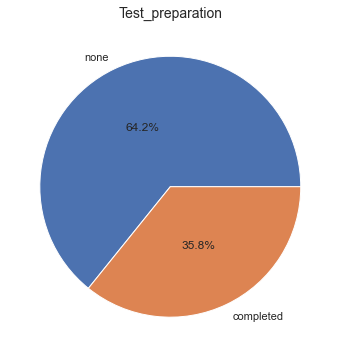

In [23]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = ["none","completed"]
plt.pie(df["Test_preparation"].value_counts(), autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Test_preparation", fontsize=14);
pie.savefig("DeliveryPieChart.png")


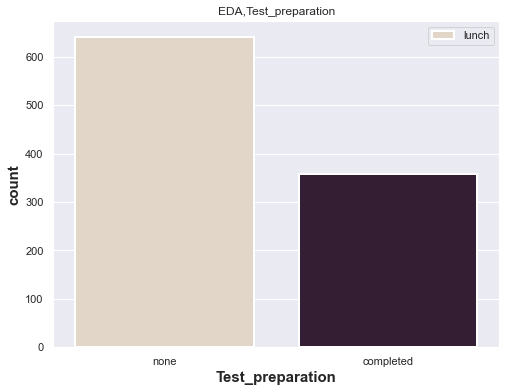

In [24]:
fig=plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.countplot(data=df,x="Test_preparation",
                  linewidth=2,
                  label="lunch", palette="ch:.25")
plt.xlabel("Test_preparation",fontweight ='bold', fontsize = 15)
plt.ylabel("count",fontweight ='bold', fontsize = 15)
plt.title('EDA,Test_preparation')
plt.legend()
plt.show()

<ul><li>We note that <b>the students who did not attend the preparation test are more than the students who completed the test

<h3>Feature Engineering


<ul><li>In this section, we will add any feature that helps us to dig into easily the data to help us to visualize by easiest way and efficient way

In [25]:
#add column may be using it late that collect all exams scores with percantage
Total_score=(df["Math_score"]+df["Reading_score"]+df["Writing_score"])/300*100
df["Total_score"]=Total_score
df.head(1)

,Gender,Race/Ethnicity,Parental_education,lunch,Test_preparation,Math_score,Reading_score,Writing_score,Total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667


<h3>Insights into Data

**In this section, we will answer our questions that we asked before**

<ul><li>Which gender achieves a high score male or female? and In any test, in particular, males or females outperform the other?

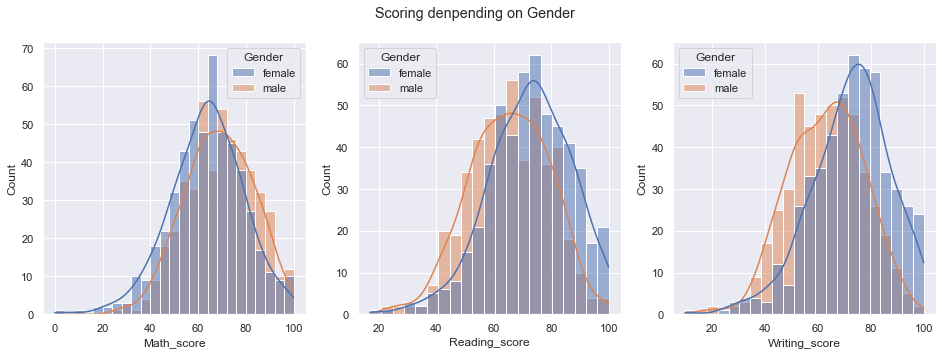

In [26]:
fig,axes=plt.subplots(1,3,figsize=[16,5])
fig.suptitle('Scoring denpending on Gender')
sns.histplot(ax=axes[0],x="Math_score",hue="Gender",data=df,kde=True)
sns.histplot(ax=axes[1],x="Reading_score",hue="Gender",data=df,kde=True)
sns.histplot(ax=axes[2],x="Writing_score",hue="Gender",data=df,kde=True)
plt.show()

<ul><li>We notice that females get higher scores than males in the reading and writing test, but in the <b>mathematics test, males get the highest marks**


<img Src="images.jfif" style="width:600px"/>



$$The - {MENS} - {are}- {Genius} $$                                                     
                                                     

**But what about the total grades. Is the result still the same?**

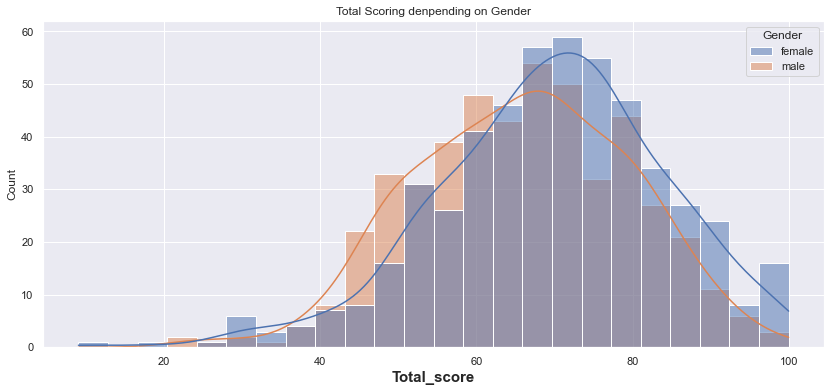

In [27]:
plt.figure(figsize=[14,6])
fig.suptitle('Total Scoring denpending on Gender')
sns.histplot(x="Total_score",hue="Gender",data=df,kde=True)
plt.xlabel("Total_score",fontweight ='bold', fontsize = 15)
plt.title("Total Scoring denpending on Gender")
plt.show()

**<ul><li>We notice that females get higher scores than males in Total scores**

<ul><li>Which race(Category) gets a higher score than the other?


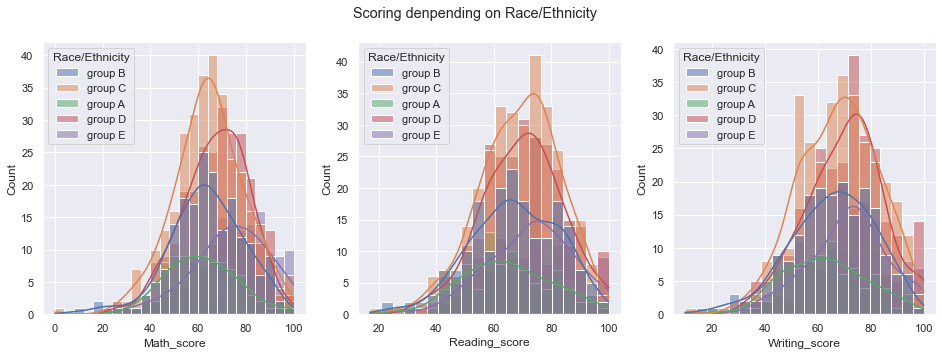

In [28]:
fig,axes=plt.subplots(1,3,figsize=[16,5])
fig.suptitle('Scoring denpending on Race/Ethnicity')
sns.histplot(ax=axes[0],x="Math_score",hue="Race/Ethnicity",data=df,kde=True)
sns.histplot(ax=axes[1],x="Reading_score",hue="Race/Ethnicity",data=df,kde=True)
sns.histplot(ax=axes[2],x="Writing_score",hue="Race/Ethnicity",data=df,kde=True)
plt.show()

<ul>
<li><b>As we can Group by E has the best performance <b>at Math<b\> Exam and Group A has the least.
<li>As we can Group by D has the best performance at Reading Exam and Group A has the least.
<li>As we can Group by D has the best performance <b> at Writing Exam and Group A has the least.



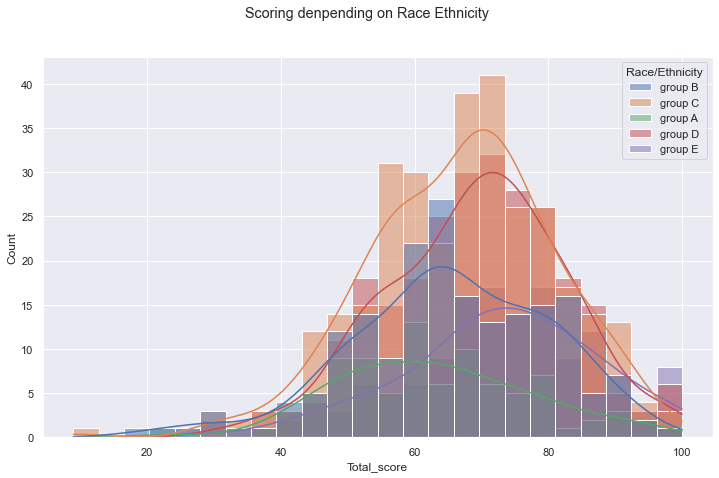

In [29]:
fig=plt.figure(figsize=[12,7])
fig.suptitle('Scoring denpending on Race Ethnicity')
sns.histplot(x="Total_score",hue="Race/Ethnicity",data=df,kde=True)
plt.show()

**As we can Group by E has the best performance among all and Group A has the least.**

<ul><li>Does parental education affect students’ grades or performance?


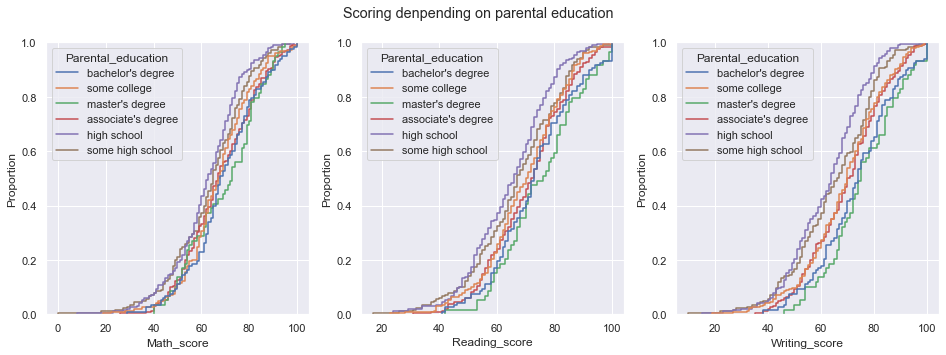

In [30]:
fig,axes=plt.subplots(1,3,figsize=[16,5])
fig.suptitle('Scoring denpending on parental education')
sns.ecdfplot(ax=axes[0],x="Math_score",hue="Parental_education",data=df)
sns.ecdfplot(ax=axes[1],x="Reading_score",hue="Parental_education",data=df)
sns.ecdfplot(ax=axes[2],x="Writing_score",hue="Parental_education",data=df)
plt.show()

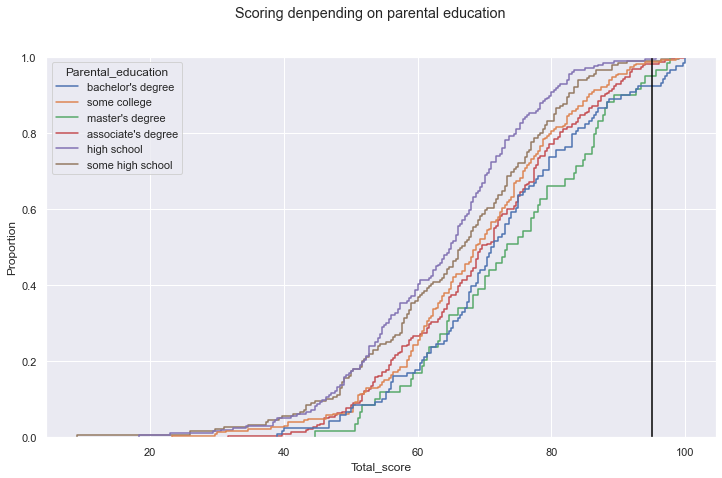

In [31]:
fig=plt.figure(figsize=[12,7])
fig.suptitle('Scoring denpending on parental education')
sns.ecdfplot(x="Total_score",hue="Parental_education",data=df)
plt.axvline(95,color="black")
plt.show()

<ul><li>Is eating a lunch before taking the exam a factor influencing students’ performance, or is it preferable not to eat a lunch?

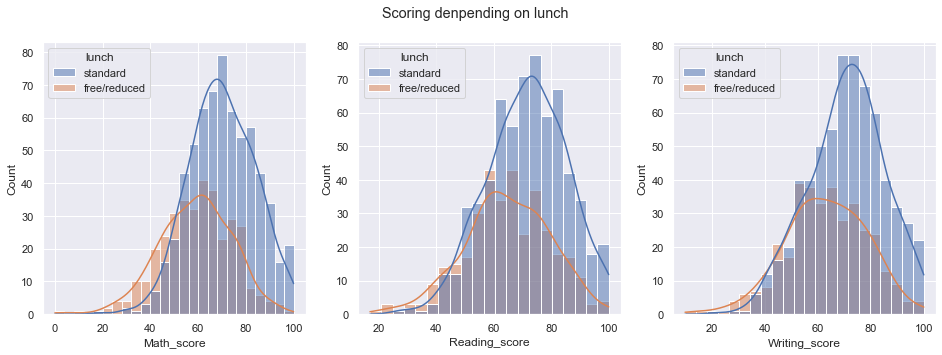

In [32]:
fig,axes=plt.subplots(1,3,figsize=[16,5])
fig.suptitle('Scoring denpending on lunch')
sns.histplot(ax=axes[0],x="Math_score",hue="lunch",data=df,kde=True)
sns.histplot(ax=axes[1],x="Reading_score",hue="lunch",data=df,kde=True)
sns.histplot(ax=axes[2],x="Writing_score",hue="lunch",data=df,kde=True)
plt.show()

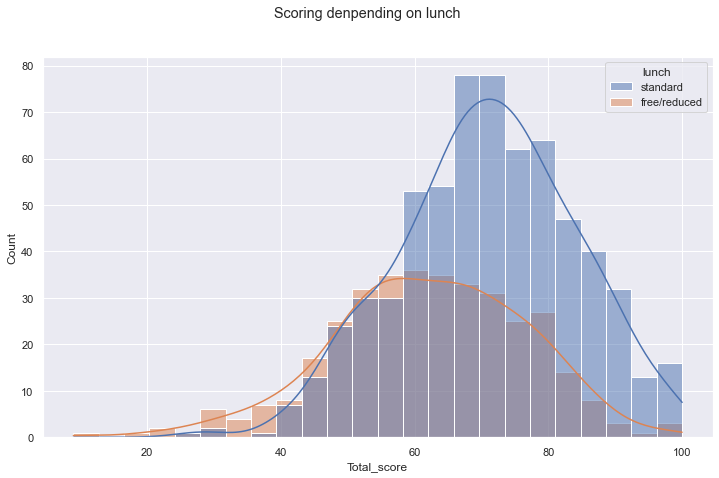

In [33]:
fig=plt.figure(figsize=[12,7])
fig.suptitle('Scoring denpending on lunch')
sns.histplot(x="Total_score",hue="lunch",data=df,kde=True)
plt.show()

**As we can Group by standard has the best performance among all and Group free/reduced has the least.**

<ul><li>Will taking a test or preparing for the exam before entering it will pave the way for you to get high grades, or not?

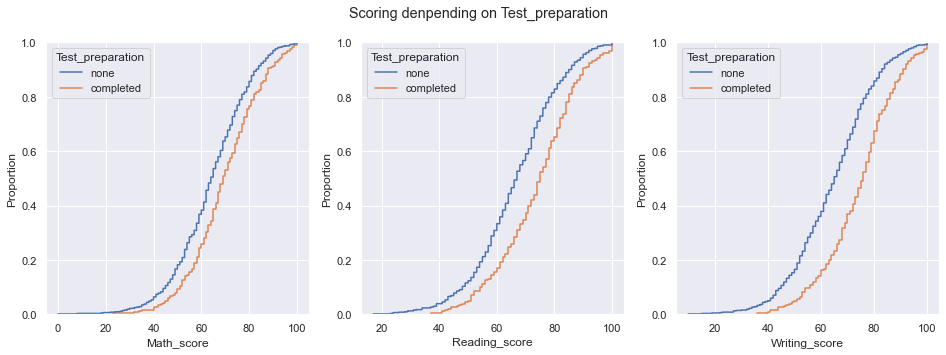

In [34]:
fig,axes=plt.subplots(1,3,figsize=[16,5])
fig.suptitle('Scoring denpending on Test_preparation')
sns.ecdfplot(ax=axes[0],x="Math_score",hue="Test_preparation",data=df)
sns.ecdfplot(ax=axes[1],x="Reading_score",hue="Test_preparation",data=df)
sns.ecdfplot(ax=axes[2],x="Writing_score",hue="Test_preparation",data=df)
plt.show()

Students who have completed test pre-course get higher scores on average in every subject, and they have scores with smaller standard deviation too.



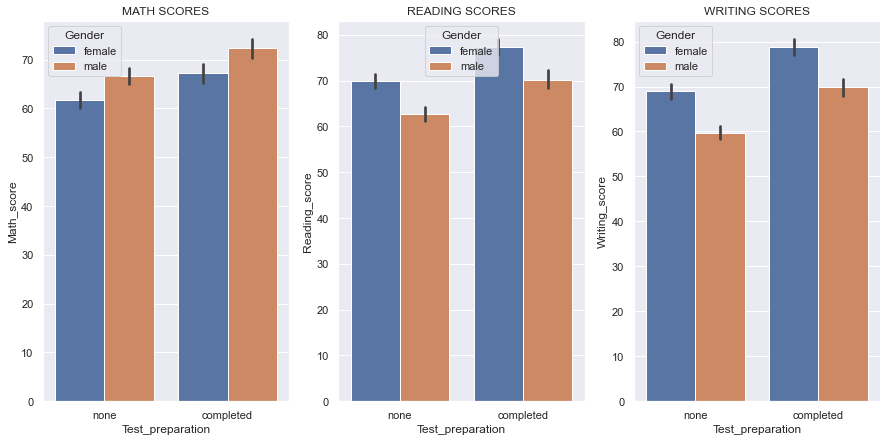

In [35]:
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
sns.barplot(x='Test_preparation',y='Math_score',data=df,hue='Gender')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='Test_preparation',y='Reading_score',data=df,hue='Gender')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='Test_preparation',y='Writing_score',data=df,hue='Gender')
plt.title('WRITING SCORES')
plt.show()

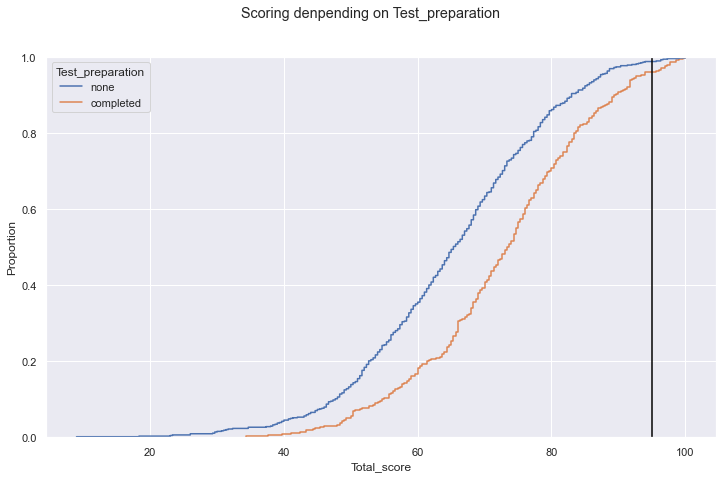

In [36]:
fig=plt.figure(figsize=[12,7])
fig.suptitle('Scoring denpending on Test_preparation')
sns.ecdfplot(x="Total_score",hue="Test_preparation",data=df)
plt.axvline(95,color="black")
plt.show()

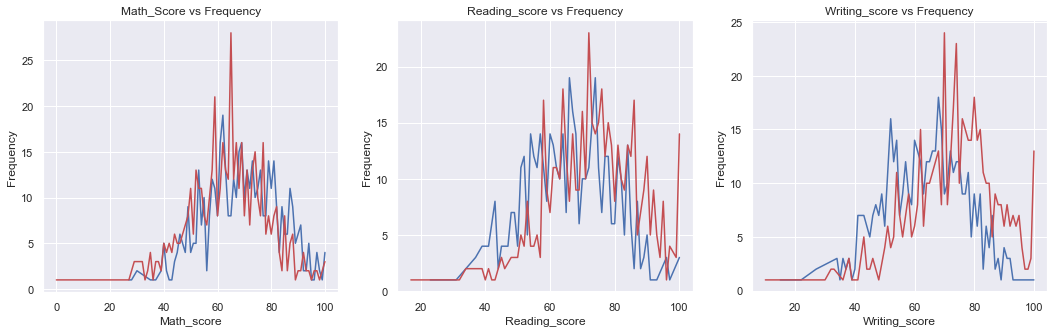

In [37]:
plt.figure(figsize=(18,5))
plt.subplot(1, 3, 1)
df[df['Gender']=='male']['Math_score'].value_counts().sort_index().plot.line(color='b')
df[df['Gender']=='female']['Math_score'].value_counts().sort_index().plot.line(color='r')
plt.xlabel('Math_score')
plt.ylabel('Frequency')
plt.title('Math_Score vs Frequency')
plt.subplot(1, 3, 2)
df[df['Gender']=='male']['Reading_score'].value_counts().sort_index().plot.line(color='b')
df[df['Gender']=='female']['Reading_score'].value_counts().sort_index().plot.line(color='r')
plt.xlabel('Reading_score')
plt.ylabel('Frequency')
plt.title('Reading_score vs Frequency')
plt.subplot(1, 3, 3)
df[df['Gender']=='male']['Writing_score'].value_counts().sort_index().plot.line(color='b')
df[df['Gender']=='female']['Writing_score'].value_counts().sort_index().plot.line(color='r')
plt.xlabel('Writing_score')
plt.ylabel('Frequency')
plt.title('Writing_score vs Frequency')
plt.show()


in general, students having done prep, score significantly more marks. there is a minimum of 5-7 marks difference and a maximum of 10+. so this a pretty significant feature, we will not drop it.



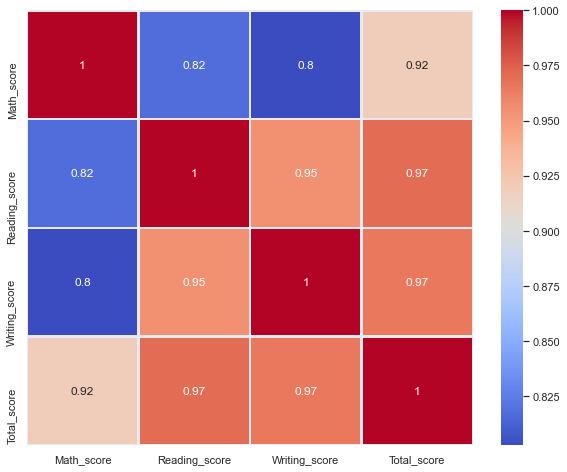

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True,  linewidths=1.5, linecolor='#EAEAF2', cmap='coolwarm')
plt.show()

<h3>Regression Approach

In [39]:
df.head(1)

,Gender,Race/Ethnicity,Parental_education,lunch,Test_preparation,Math_score,Reading_score,Writing_score,Total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667


In [40]:
m,b=np.polyfit(df["Math_score"],df["Reading_score"],1)
y_pred=b+m*df["Math_score"]
y_pred

0      73.822312
1      71.460624
2      87.992438
3      54.141581
4      76.971229
         ...    
995    86.417980
996    65.950020
997    63.588332
998    70.673395
999    77.758458
Name: Math_score, Length: 1000, dtype: float64

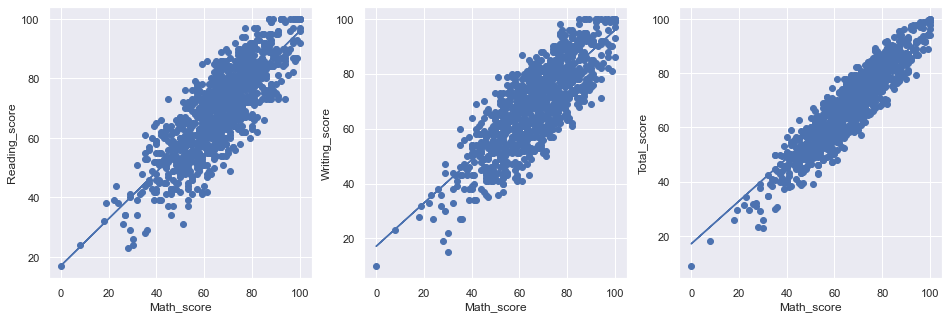

In [41]:
plt.figure(figsize=(16,5))
plt.subplot(1, 3, 1)
plt.scatter(df["Math_score"],df["Reading_score"])
plt.plot(df["Math_score"],y_pred)
plt.xlabel("Math_score")
plt.ylabel("Reading_score")
plt.subplot(1, 3, 2)
plt.scatter(df["Math_score"],df["Writing_score"])
plt.plot(df["Math_score"],y_pred)
plt.xlabel("Math_score")
plt.ylabel("Writing_score")
plt.subplot(1, 3, 3)
plt.scatter(df["Math_score"],df["Total_score"])
plt.plot(df["Math_score"],y_pred)
plt.xlabel("Math_score")
plt.ylabel("Total_score")
plt.show()

<h3>Feature Engineering

In [42]:
X = df.drop(["Reading_score", "Math_score", "Writing_score","Total_score"],axis=1)
y = df["Writing_score"]


In [43]:
X = pd.get_dummies(X,columns=['Gender','Race/Ethnicity','Parental_education','lunch','Test_preparation'])
X.head()

,Gender_female,Gender_male,Race/Ethnicity_group A,Race/Ethnicity_group B,Race/Ethnicity_group C,Race/Ethnicity_group D,Race/Ethnicity_group E,Parental_education_associate's degree,Parental_education_bachelor's degree,Parental_education_high school,Parental_education_master's degree,Parental_education_some college,Parental_education_some high school,lunch_free/reduced,lunch_standard,Test_preparation_completed,Test_preparation_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
preds=model.predict(X_test)

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print("R_Square score: ", r2_score(y_test,preds))

MAE: 11.697005194773217
MSE: 207.81174432278837
RMSE: 14.41567703310491
R_Square score:  0.12575946632314683


<h5>Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_predictions = lr.predict(X_test)
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [ 2.57205353e+15  2.57205353e+15  1.19375896e+15  1.19375896e+15
  1.19375896e+15  1.19375896e+15  1.19375896e+15 -1.64609223e+14
 -1.64609223e+14 -1.64609223e+14 -1.64609223e+14 -1.64609223e+14
 -1.64609223e+14  8.90474658e+14  8.90474658e+14 -1.00813704e+15
 -1.00813704e+15]


In [47]:
### Fit Your Linear Model And Obtain the Results
X['intercept'] = 1
lm = sms.OLS(df['Total_score'],X[["intercept",'Gender_female', 'Gender_male', 'Race/Ethnicity_group A',
       'Race/Ethnicity_group B', 'Race/Ethnicity_group C',
       'Race/Ethnicity_group D', 'Race/Ethnicity_group E',
       "Parental_education_associate's degree",
       "Parental_education_bachelor's degree",
       'Parental_education_high school', "Parental_education_master's degree",
       'Parental_education_some college',
       'Parental_education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'Test_preparation_completed',
       'Test_preparation_none']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_score   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     26.30
Date:                Sat, 09 Apr 2022   Prob (F-statistic):           7.55e-52
Time:                        01:35:29   Log-Likelihood:                -3937.0
No. Observations:                1000   AIC:                             7900.
Df Residuals:                     987   BIC:                             7964.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
intercept                                23.7809      0.177    134.306      0.000      23.433      24.128
Gender_female                            13.7526      0.406     33.913      0.000      12.957      14.548
Gender_male                              10.0284      0.409     24.495      0.000       9.225      10.832
Race/Ethnicity_group A                    1.5624      1.133      1.379      0.168      -0.661       3.785
Race/Ethnicity_group B                    3.0914      0.830      3.726      0.000       1.463       4.720
Race/Ethnicity_group C                    3.9479      0.690      5.720      0.000       2.594       5.302
Race/Ethnicity_group D                    6.6882      0.738      9.057      0.000       5.239       8.137
Race/Ethnicity_group E                    8.4910      0.937      9.060      0.000       6.652      10.330
Parental_education_associate's degree     4.6322      0.812      5.702      0.000       3.038       6.226
Parental_education_bachelor's degree      7.1678      1.040      6.894      0.000       5.127       9.208
Parental_education_high school           -0.5403      0.855     -0.632      0.528      -2.218       1.138
Parental_education_master's degree        8.7244      1.417      6.156      0.000       5.943      11.505
Parental_education_some college           3.7046      0.805      4.601      0.000       2.125       5.285
Parental_education_some high school       0.0922      0.884      0.104      0.917      -1.642       1.827
lunch_free/reduced                        7.5029      0.442     16.993      0.000       6.636       8.369
lunch_standard                           16.2780      0.404     40.310      0.000      15.486      17.070
Test_preparation_completed               15.7098      0.443     35.471      0.000      14.841      16.579
Test_preparation_none                     8.0712      0.405     19.921      0.000       7.276       8.866
==============================================================================
Omnibus:                       12.572   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.915
Skew:                          -0.274   Prob(JB):                      0.00157
Kurtosis:                       2.897   Cond. No.                     1.43e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.47e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<h3>Conclusion


<h4>The following can be concluded:


<ul>

<li>The gender of the student does not depend on the student's overall performance. male students usually outperform female students in mathematics. Female students perform better than male students in reading and writing tests.
Completing a test preparation degree is beneficial for students. Thus students should try to complete it.
<li>The educational qualification of the parents is important when it comes to the performance of the students. He notes that children of parents who have a college degree - whether it's a bachelor's, master's or university degree - perform better than children of parents who have graduated from high school.
<li>It is also observed that students who belong to ethnic group E perform better than students who belong to group B.
<li>A student's family income plays a large role in a student's academic performance. Students who chose to eat a regular lunch tended to have better results than students who chose to eat a free lunch.

**In general, taking exam preparation courses and proper nutrition is beneficial for students.**